In [11]:
# Feature Extraction with RFE
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR

# this is recursive feature

Resource: https://machinelearningmastery.com/feature-selection-machine-learning-python/

In [15]:
df_data = pd.read_csv("../data/train.csv")
# print(df_data.head())

X_cols = ['Subject Focus','Eyes', 'Face','Near','Action','Accessory','Group','Collage','Human','Occlusion','Info','Blur',]
X = df_data[X_cols]
Y = df_data['Pawpularity'].values[:]
X.head()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,0,1,1,1,0,0,1,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,0,0,0,1,1,0,0
3,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0


## Top 3 Logistic Regression

In [19]:
# feature extraction
model = LogisticRegression(solver='liblinear')
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

pd.DataFrame(rfe.support_,index=X.columns,columns=['Rank'])

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Num Features: 3
Selected Features: [False False  True  True False False  True False False False False False]
Feature Ranking: [ 6  8  1  1  7 10  1  2  9  5  4  3]


,Rank
Subject Focus,False
Eyes,False
Face,True
Near,True
Action,False
Accessory,False
Group,True
Collage,False
Human,False
Occlusion,False


## Top 3 SVC

In [18]:
model = SVC(kernel="linear")
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

pd.DataFrame(rfe.support_,index=X.columns,columns=['Rank'])

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Num Features: 3
Selected Features: [ True False  True False False False False  True False False False False]
Feature Ranking: [ 1  8  1 10  5  7  6  1  9  4  2  3]


,Rank
Subject Focus,True
Eyes,False
Face,True
Near,False
Action,False
Accessory,False
Group,False
Collage,True
Human,False
Occlusion,False


## Trying RFE with cross validation

resource: https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

In [20]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 2  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, Y)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 6


In [21]:
print("Selected Features: %s" % rfecv.support_)
print("Feature Ranking: %s" % rfecv.ranking_)

Selected Features: [ True False  True False False False False  True False  True  True  True]
Feature Ranking: [1 5 1 7 2 4 3 1 6 1 1 1]


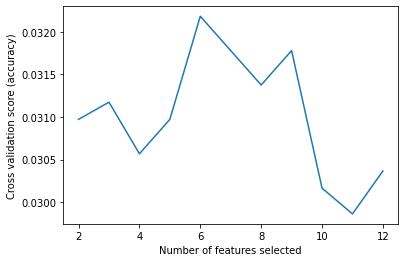

In [22]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [23]:
pd.DataFrame(rfe.support_,index=X.columns,columns=['Rank'])

,Rank
Subject Focus,False
Eyes,False
Face,True
Near,True
Action,False
Accessory,False
Group,True
Collage,False
Human,False
Occlusion,False
